# Spin-Hamiltonian Simulation Using Numpy

This Jupyter Notebook demonstrates how to perform classical simulations of spin systems using the Heisenberg and Transverse Field Ising Model (TFIM) Hamiltonians. We will compute the exact unitary evolution of these systems using matrix exponentials.

## Introduction

Quantum spin chains are fundamental models in condensed matter physics and quantum computing. Simulating their dynamics helps us understand various quantum phenomena such as entanglement, phase transitions, and more.

### Heisenberg Hamiltonian

The Heisenberg Hamiltonian for a one-dimensional spin chain with nearest-neighbor interactions is given by:

$$
H = \sum_{i} \left( J_x S_i^x S_{i+1}^x + J_y S_i^y S_{i+1}^y + J_z S_i^z S_{i+1}^z \right)
$$

- $S_i^\alpha$ are the spin operators (Pauli matrices) acting on spin $i$ in the $ \alpha$-direction ( $\alpha = x, y, z$).
- $J_x, J_y, J_z$ are the coupling coefficients between spins.

---

### Transverse Field Ising Model (TFIM)

The TFIM Hamiltonian is a simplified model focusing on the competition between an external transverse magnetic field and nearest-neighbor spin interactions:

$$
H = -h \sum_i S_i^x - \sum_i S_i^z S_{i+1}^z
$$

- $h$ is the strength of the transverse magnetic field.
- The first term represents the interaction of spins with the external field in the $x$-direction.
- The second term represents the interaction between neighboring spins in the $z$-direction.

---

### Exact Time Evolution

We compute the exact unitary time evolution operator $U(t) = e^{-iHt}$ using matrix exponentials. This approach is computationally intensive for large systems but provides precise results for small spin chains.

In [1]:
# Import required libraries
import numpy as np
import scipy.linalg  # For matrix exponential
import matplotlib.pyplot as plt

## Pauli Matrices and Qubit States

Define the Pauli matrices and the computational basis states for a single qubit.

In [10]:
# Pauli matrices as numpy arrays
I = np.array([[1, 0], [0, 1]], dtype=complex)  # Identity matrix
X = np.array([[0, 1], [1, 0]], dtype=complex)  # Pauli-X matrix
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)  # Pauli-Y matrix
Z = np.array([[1, 0], [0, -1]], dtype=complex)  # Pauli-Z matrix

# Qubit basis states
Zero = np.array([1, 0], dtype=complex)  # |0⟩ state
One = np.array([0, 1], dtype=complex)   # |1⟩ state

## Tensor Product Function

Define a function to compute the tensor product of multiple matrices or vectors.

In [18]:
def tensor_product(*matrices):
    """Compute the tensor product of a sequence of matrices or vectors."""
    result = matrices[0]
    for m in matrices[1:]:
        result = np.kron(result, m)
    return result

## Heisenberg Hamiltonian Function

Define a function to construct the Heisenberg Hamiltonian for \( n \) qubits with given coupling coefficients.

In [25]:
def H_heis_n(num_qubits, Jx=1.0, Jy=1.0, Jz=1.0):
    """Construct the Heisenberg XYZ Hamiltonian for `num_qubits` qubits with couplings Jx, Jy, Jz."""
    H = np.zeros((2**num_qubits, 2**num_qubits), dtype=complex)
    # Add interaction terms between each adjacent pair of qubits
    for i in range(num_qubits - 1):
        # Build the tensor products for each term
        X_term = Jx * tensor_product(*[X if j == i or j == i + 1 else I for j in range(num_qubits)])
        Y_term = Jy * tensor_product(*[Y if j == i or j == i + 1 else I for j in range(num_qubits)])
        Z_term = Jz * tensor_product(*[Z if j == i or j == i + 1 else I for j in range(num_qubits)])
        # Add to Hamiltonian
        H += X_term + Y_term + Z_term
    return H

## Transverse Field Ising Model (TFIM) Hamiltonian Function

Define a function to construct the TFIM Hamiltonian for \( n \) qubits with a given transverse field strength.

In [31]:
def H_tfim_n(num_qubits, h=1.0):
    """Construct the Transverse Field Ising Model Hamiltonian for `num_qubits` qubits with field `h`."""
    H = np.zeros((2**num_qubits, 2**num_qubits), dtype=complex)
    # Add ZZ interaction terms between adjacent qubits
    for i in range(num_qubits - 1):
        ZZ_term = tensor_product(*[Z if j == i or j == i + 1 else I for j in range(num_qubits)])
        H += ZZ_term
    # Add transverse field terms
    for i in range(num_qubits):
        X_term = h * tensor_product(*[X if j == i else I for j in range(num_qubits)])
        H += X_term
    return H

## Time Evolution Operator Function

Define a function to compute the unitary time evolution operator \( U(t) = e^{-iHt} \) for the specified model.

In [36]:
def U_n(t, num_qubits, model="heisenberg", h=1.0, Jx=1.0, Jy=1.0, Jz=1.0):
    """Compute the unitary time evolution operator for the specified model."""
    if model == "heisenberg":
        H = H_heis_n(num_qubits, Jx=Jx, Jy=Jy, Jz=Jz)
    elif model == "tfim":
        H = H_tfim_n(num_qubits, h=h)
    else:
        raise ValueError("Invalid model. Choose 'heisenberg' or 'tfim'.")
    # Compute the matrix exponential
    U = scipy.linalg.expm(-1j * H * t)
    return U

## Generate Initial State Function

Define a function to generate the initial state vector from a binary string, e.g., `'110'` for \(|110⟩\).

In [40]:
def generate_initial_state(state_str):
    """Generate the initial state from a binary string, e.g., '110' for |110⟩."""
    state = [One if bit == '1' else Zero for bit in state_str]
    return tensor_product(*state)

## Simulation Parameters

Set up the parameters for the simulation, including the number of qubits, initial state, model type, and coupling constants.

In [43]:
# Parameters
num_qubits = 4
initial_state_str = '1010'  # Define your initial state as a string of bits
model = "heisenberg"       # Choose between "heisenberg" and "tfim"
h_field = 1.0              # Transverse field strength for TFIM
Jx, Jy, Jz = 1.0, 1.0, 1.0 # Couplings for Heisenberg XYZ model

initial_state = generate_initial_state(initial_state_str)

## Compute and Plot Results

Compute the probability of remaining in the initial state over time and plot the results.

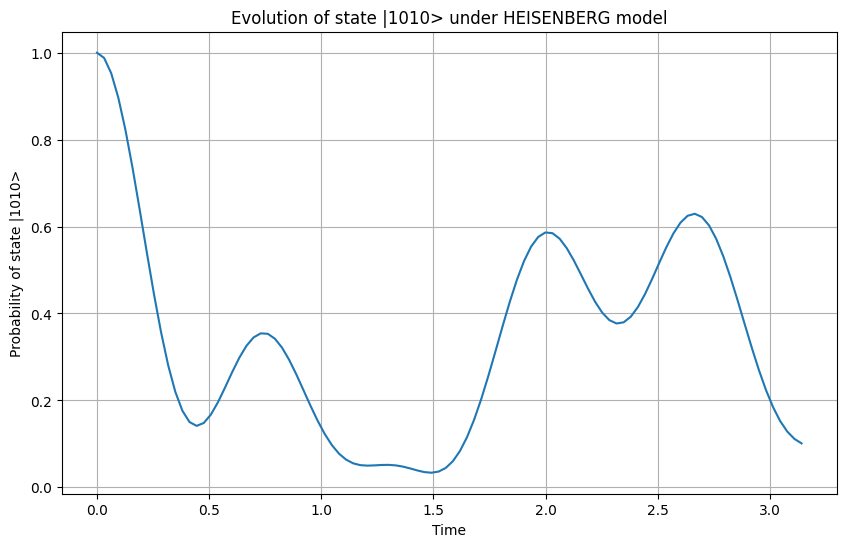

In [45]:
# Define array of time points
ts = np.linspace(0, np.pi, 100)

# Compute probability of remaining in the initial state over time
probs = []
for t in ts:
    U = U_n(t, num_qubits, model=model, h=h_field, Jx=Jx, Jy=Jy, Jz=Jz)
    evolved_state = U @ initial_state
    probability = np.abs(np.vdot(initial_state, evolved_state))**2
    probs.append(probability)

# Plot the evolution of the probability
plt.figure(figsize=(10, 6))
plt.plot(ts, probs)
plt.xlabel('Time')
plt.ylabel(f'Probability of state |{initial_state_str}>')
plt.title(f'Evolution of state |{initial_state_str}> under {model.upper()} model')
plt.grid(True)
plt.show()